In [73]:
import json
import pandas as pd
import numpy as np
import os
import re
import sys

In [74]:
file_dir ='C:/Users/ikizl/Data_Analytics_Portfolio/08_Movies_ETL/Movies-ETL/'

In [75]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [76]:
len(wiki_movies_raw)

7311

In [77]:
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [78]:
#first 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [79]:
wiki_movies_raw[99]

{'url': 'https://en.wikipedia.org/wiki/Guns_(film)',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0099720/',
 'title': 'Guns',
 'Directed by': 'Andy Sidaris',
 'Produced by': 'Arlene Sidaris',
 'Written by': 'Andy Sidaris',
 'Starring': ['Erik Estrada',
  'Dona Speir',
  'Devin DeVasquez',
  'Danny Trejo',
  'Cynthia Brimhall'],
 'Music by': 'Richard Lyons',
 'Cinematography': 'Howard Wexler',
 'Edited by': 'Michael Haight',
 'Distributed by': 'Malibu Bay Films',
 'Release date': 'November 9, 1990',
 'Running time': '96 minutes',
 'Country': 'United States',
 'Language': 'English'}

In [80]:
kaggle_metadata = pd.read_csv(f"{file_dir}/movies_metadata.csv",low_memory=False)
kaggle_metadata.head()




,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [81]:
ratings = pd.read_csv(f"{file_dir}/ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [82]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
6208,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,42017,tt0090585,en,Absolute Beginners,A musical adaptation of Colin MacInnes' novel ...,...,1986-01-01,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the world of your dreams!,Absolute Beginners,False,5.9,14.0
42305,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://betteroffsingle.com/,333358,tt2081374,en,Better Off Single,A comedy that follows a man on a mission of se...,...,2016-10-07,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Better Off Single,False,4.9,11.0
39318,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,60971,tt0051361,ja,暗黒街の美女,"The moment he's released from prison, the hono...",...,1958-03-25,0.0,87.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Underworld Beauty,False,5.3,8.0
8806,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,64353,tt0081874,en,The Hitch Hikers Guide to the Galaxy,An Earth Man and his alien friend escape an ex...,...,1981-02-09,0.0,150.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't Panic,The Hitch Hikers Guide to the Galaxy,False,7.2,41.0
2039,False,"{'id': 102782, 'name': 'House Collection', 'po...",3000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,11415,tt0091223,en,House,Roger Cobb is a author who has just separated ...,...,1986-02-28,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Ding dong, You’re dead.",House,False,5.8,144.0


In [83]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
21798553,226425,1,5.0,862515198
7279329,75049,150,3.0,835525375
22342078,231882,1681,3.5,1394479500
5996089,61701,10,4.5,1119463356
14751358,153383,6807,2.5,1470164258


In [84]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring',
       ...
       'Predecessor', 'Founders', 'Area served', 'Products', 'Services',
       'Russian', 'Hebrew', 'Revenue', 'Operating income', 'Polish'],
      dtype='object', length=193)

In [86]:
wiki_movies_df["Arabic"].value_counts()

قضية رقم ٢٣    1
کفرناحوم‎      1
Name: Arabic, dtype: int64

In [87]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring',
       ...
       'Predecessor', 'Founders', 'Area served', 'Products', 'Services',
       'Russian', 'Hebrew', 'Revenue', 'Operating income', 'Polish'],
      dtype='object', length=193)

In [88]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [89]:
wiki_movies = [movie for movie in wiki_movies_raw
              if ("Director" in movie or "Directed by" in movie) and 'imdb_link' in movie and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [90]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [92]:
#Example
my_list = [1,2,3]

def append_four(x):
    x.append(4)
    print(my_list)

append_four(my_list)

    


[1, 2, 3, 4]


In [93]:
my_list = [4,5,6,7]

def append_burak(x):
    x.append("burak")
    
append_burak(my_list)
print(my_list)

[4, 5, 6, 7, 'burak']


In [94]:
new_my_list = (my_list)
new_my_list

[4, 5, 6, 7, 'burak']

In [95]:
square = lambda x : x*x
square(6)

36

In [96]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [97]:
#make a list of cleaned movies with list compherension

clean_movies = [clean_movie(movie) for movie in wiki_movies]


In [98]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [99]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Narrated by', 'Cinematography', 'Release date', 'Running time',
       'Country', 'Language', 'Budget', 'Box office', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'Genre', 'Original language(s)',
       'Original network', 'Executive producer(s)', 'Production location(s)',
       'Picture format', 'Audio format', 'Voices of', 'Followed by',
       'Created by', 'Preceded by', 'Suggested by', 'alt_titles', 'Recorded',
       'Venue', 'Label', 'Animation by', 'Color process', 'McCune–Reischauer'],
      dtype='object')

## ################################################################

In [100]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

KeyError: 'Arabic'

In [ ]:
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]["url"]

In [ ]:
wiki_movies_df[wiki_movies_df["McCune–Reischauer"].notnull()]["McCune–Reischauer"]

In [ ]:
sorted(wiki_movies_df.columns.tolist())

In [ ]:
wiki_movies_df[wiki_movies_df["Also known as"].notnull()]["Also known as"]

In [ ]:
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]["Arabic"]

In [ ]:
wiki_movies_df[wiki_movies_df["Chinese"].notnull()]["Chinese"]

In [ ]:
wiki_movies_df[wiki_movies_df['McCune–Reischauer'].notnull()]["McCune–Reischauer"]

In [ ]:
wiki_movies_df[wiki_movies_df["Romanized"].notnull()]["Romanized"]

In [ ]:
wiki_movies_df[wiki_movies_df["Director"].notnull()]["Director"]

In [ ]:
wiki_movies_df[wiki_movies_df["Based on"].notnull()]["Based on"]

In [ ]:
wiki_movies_df[wiki_movies_df["Language"].notnull()]["Language"]

In [ ]:
wiki_movies_df[wiki_movies_df["Polish"].notnull()]["Polish"]

# ############################################################

# REGULAR EXPRESSION ON DATAFRAME  (ROWs)

In [18]:
wiki_movies_df["imdb_id"] = wiki_movies_df["imdb_link"].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

wiki_movies_df.drop_duplicates(subset="imdb_id", inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7311
7056


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [19]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]


[['url', 1],
 ['year', 1],
 ['imdb_link', 1],
 ['title', 6],
 ['Directed by', 22],
 ['Produced by', 381],
 ['Screenplay by', 4748],
 ['Story by', 6059],
 ['Based on', 4872],
 ['Starring', 201],
 ['Narrated by', 6773],
 ['Music by', 616],
 ['Cinematography', 711],
 ['Edited by', 718],
 ['Productioncompany ', 2554],
 ['Distributed by', 518],
 ['Release date', 211],
 ['Running time', 153],
 ['Country', 403],
 ['Language', 259],
 ['Budget', 2318],
 ['Box office', 1572],
 ['Written by', 2511],
 ['Genre', 6934],
 ['Theme music composer', 6986],
 ['Country of origin', 6898],
 ['Original language(s)', 6892],
 ['Producer(s)', 6896],
 ['Editor(s)', 6905],
 ['Production company(s)', 6920],
 ['Original network', 6925],
 ['Original release', 6891],
 ['Productioncompanies ', 6334],
 ['Executive producer(s)', 6955],
 ['Production location(s)', 7006],
 ['Distributor', 6916],
 ['Picture format', 6987],
 ['Audio format', 6992],
 ['Voices of', 7053],
 ['Followed by', 7045],
 ['Composer(s)', 7046],
 ['Cre

In [20]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]


['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Productioncompanies ',
 'imdb_id']

In [21]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df)*0.9 ] 
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Distributed by,Release date,Running time,Country,Language,Budget,Box office,Written by,Productioncompanies,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,English,$20 million,$21.4 million,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,English,$6 million,$2.7 million,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,"[English, Lao]",$35 million,"$57,718,089",NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,English,$12 million,"$7,331,647",Woody Allen,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,Paramount Pictures,"December 19, 1990",95 minutes,US,English,$25 million,"$6,939,946 (USA)",Paul Hogan,NaN,tt0099018


In [22]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Productioncompanies ',
 'imdb_id']

In [23]:
#FInd the data types on wiki_movies_df

wiki_movies_df.dtypes

url                      object
year                    float64
imdb_link                object
title                    object
Directed by              object
Produced by              object
Screenplay by            object
Story by                 object
Based on                 object
Starring                 object
Music by                 object
Cinematography           object
Edited by                object
Productioncompany        object
Distributed by           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Written by               object
Productioncompanies      object
imdb_id                  object
dtype: object

In [24]:
box_office = wiki_movies_df["Box office"].dropna()
wiki_movies_df["Box office"].count()

5484

In [25]:
def is_not_a_string(x):
    return type(x) != str

box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
56      [$6,698,361 (, United States, ), [2]]
77                    [$6,488,144, (US), [1]]
129                [US$1,531,489, (domestic)]
133                          [US$, 4,803,039]
                        ...                  
7212               [$99.6, million, [4], [5]]
7226                   [$365.6, million, [1]]
7227                         [$53.8, million]
7249                     [$435, million, [7]]
7283                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [26]:
# lambda argument : expression

lambda x: types(x) != str

<function __main__.<lambda>(x)>

In [27]:
#We can update our map() call to use the lambda function directly instead of using is_not_a_string():

box_office[box_office.map(lambda x: type(x) !=str)]

34                           [US$, 4,212,828]
56      [$6,698,361 (, United States, ), [2]]
77                    [$6,488,144, (US), [1]]
129                [US$1,531,489, (domestic)]
133                          [US$, 4,803,039]
                        ...                  
7212               [$99.6, million, [4], [5]]
7226                   [$365.6, million, [1]]
7227                         [$53.8, million]
7249                     [$435, million, [7]]
7283                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [28]:
#Example for join

some_list = ["One", "Two","Tree"]

"mississippi".join(some_list)

'OnemississippiTwomississippiTree'

In [29]:
box_office = box_office.apply(lambda x:' '.join(x) if type(x) == list else x)

In [30]:
#Now we will find how many different styles are present when writing box office amouts ( also imported re)



 ## WRITE REGULAR EXPRESSION

## PARSE THE BOX OFFICE DATA

In [31]:
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"

#There are 3,896 box office values that match the form "$123.4 million/billion."

box_office.str.contains(form_one, flags = re.IGNORECASE, na  =False).sum()

3902

In [32]:
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)"
box_office.str.contains(form_two, flags = re.IGNORECASE, na=False).sum()

1559

In [33]:
matches_form_one = box_office.str.contains(form_one, flags = re.IGNORECASE, na = False)

matches_form_two = box_office.str.contains(form_two, flags = re.IGNORECASE, na = False)


box_office[~matches_form_one & ~matches_form_two]

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [34]:
box_office.str.extract(f'({form_one} | {form_two})')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7305,NaN
7306,NaN
7307,NaN
7308,NaN


In [35]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags = re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags = re.IGNORECASE):
        

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan
    

In [36]:
wiki_movies_df["box_office"] = box_office.str.extract(f'({form_one}|{form_two})', flags = re.IGNORECASE)[0].apply(parse_dollars)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7306    41900000.0
7307    76100000.0
7308    38400000.0
7309     5500000.0
7310           NaN
Name: box_office, Length: 7056, dtype: float64

## PARSE BUDGET DATA

In [38]:
# drop the NaN Values

budget = wiki_movies_df["Budget"].dropna()

In [39]:
#Convert any lists to string
budget = budget.map(lambda x :' '.join(x) if type(x) == list else x )

In [40]:
# Remove any values between dollar sign and hyphen ( for budget given in range)
budget = budget.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\object_array.py:156: FutureWarning: Possible set difference at position 6
  pat = re.compile(pat, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


113                    $5–7 million
139                         Unknown
201        $6.5–10 million [Note 1]
210     60 million Norwegian Kroner
242                  $50–65 million
                   ...             
7297               $100–150 million
7301               $160–200 million
7302               $102–135 million
7303                 $39–50 million
7305                   €4.3 million
Name: Budget, Length: 230, dtype: object

In [41]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## PARSE RELEASE DATE 

In [64]:
 release_date = wiki_movies_df["Release date"].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [65]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [66]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7306,"December 25, 2018"
7307,"December 11, 2018"
7308,"November 8, 2018"
7309,"August 31, 2018"


In [67]:
wiki_movies_df["release_date"] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format = True)

## PARSE RUNNING TIME

In [69]:
# First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

running_time = wiki_movies_df["Running time"].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [72]:
running_time.str.contains(r'^\d*\sminutes$', flags= re.IGNORECASE, na=False).sum()

6536

In [101]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags = re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6719       114 minutes [1] 120 minutes (extended edition)
6866                                             104 mins
6934    90 minutes (theatrical) [1] 91 minutes (unrate...
7292    108 minutes (Original cut) 98 minutes (UK cut)...
7310                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [102]:
running_time.str.contains(r'^\d*\s*m', flags= re.IGNORECASE, na = False).sum()

6886

In [104]:
running_time[running_time.str.contains(r'^\d*\s*m', flags = re.IGNORECASE, na = False) != True]

651                                                  3:52
689                     UK:84 min (DVD version) US:86 min
751                         78-102 min (depending on cut)
869                       Varies (79 [3] –84 [1] minutes)
1503    United States: 77 minutes Argentina: 94 minute...
1560                                            1hr 35min
1615                                               varies
1859                    Netherlands:96 min, Canada:95 min
1862                                       approx. 14 min
2382                                           1 h 43 min
3123                                               1h 48m
4074                                              4 hours
4599    US domestic version: 86 minutes Original versi...
5156    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5621                    115 [1] /123 [2] /128 [3] minutes
5645                                    1 hour 32 minutes
7310                Variable; 90 minutes for default path
Name: Running 

In [105]:
running_time_extract =running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [106]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce').fillna(0))

In [108]:
#HOURS TO MINUTES

wiki_movies_df["running_time"] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row [2] == 0 else row[2],axis=1)

In [110]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

# CLEAN THE KAGGLE DATA  8.3.12

In [113]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [114]:
# we are checking if all the values are true or false for  adult and video column

kaggle_metadata["adult"].value_counts()


False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [115]:
#REMOVE THE BAD DATA
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#Keep the adult is false and drop the adult column

kaggle_metadata = kaggle_metadata[kaggle_metadata["adult"] == 'False'].drop('adult', axis='columns')

In [117]:
kaggle_metadata["video"].value_counts()

False    45358
True        93
Name: video, dtype: int64

### Converting the data types 

In [119]:
kaggle_metadata["video"] = 'True'
# The above code creates a boolen column we want, We just need to assign it back to video:

kaggle_metadata["video"] = kaggle_metadata['video'] = 'True'

In [123]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata["popularity"] = pd.to_numeric(kaggle_metadata['popularity'], errors = 'raise')
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [127]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [128]:
pd.to_datetime(ratings["timestamp"], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [129]:
ratings['timestamp'] = pd.to_datetime(ratings["timestamp"], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

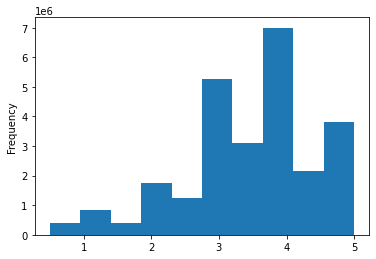

In [130]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings["rating"].plot(kind = 'hist')
ratings["rating"].describe()